In [1]:
import pandas as pd
import numpy as np
import requests
import json
import calendar
import time
import re
from dateutil.parser import parse
import matplotlib.pyplot as plt
import decimal
import sklearn

import boto3
import base64
from botocore.exceptions import ClientError

In [2]:
df = pd.read_csv('consolidated_coin_data.csv')
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,24-Apr-19,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,23-Apr-19,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,22-Apr-19,0.322277,0.32935,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,21-Apr-19,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,20-Apr-19,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


In [3]:
df['Currency'].value_counts()

litecoin        2305
bitcoin         2305
ripple          2207
stellar         1841
tether          1632
ethereum        1484
eos              780
bitcoin-cash     758
binance-coin     756
cardano          688
Name: Currency, dtype: int64

In [4]:
df.loc[df['Currency'] == 'bitcoin']

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
3392,bitcoin,24-Apr-19,5571.51,5642.04,5418.26,5464.87,"17,048,033,399","96,530,038,144"
3393,bitcoin,23-Apr-19,5399.37,5633.8,5389.41,5572.36,"15,867,308,108","98,417,387,004"
3394,bitcoin,22-Apr-19,5312.49,5422.69,5280.28,5399.37,"14,601,631,648","95,354,207,776"
3395,bitcoin,21-Apr-19,5335.88,5359.93,5257.34,5314.53,"13,731,844,223","93,847,052,256"
3396,bitcoin,20-Apr-19,5304.16,5358.49,5295.88,5337.89,"13,169,647,522","94,248,717,444"
3397,bitcoin,19-Apr-19,5298.15,5336.68,5233.34,5303.81,"13,780,238,655","93,638,345,002"
3398,bitcoin,18-Apr-19,5251.48,5319.99,5250.51,5298.39,"13,256,489,918","93,532,402,741"
3399,bitcoin,17-Apr-19,5236.14,5274.28,5219.21,5251.94,"12,438,480,677","92,702,617,458"
3400,bitcoin,16-Apr-19,5066.58,5238.95,5055.19,5235.56,"11,618,660,197","92,404,613,297"
3401,bitcoin,15-Apr-19,5167.32,5196.61,5024.07,5067.11,"12,290,155,061","89,422,237,603"


In [5]:
df['UnixDate'] = ""
df['UnixDate'] = df['Date'].apply(lambda x : calendar.timegm(time.strptime(parse(x).date().strftime("%m-%d-%Y"), '%m-%d-%Y')))
df['Date'] = df['Date'].apply(lambda x : parse(x).date().strftime("%m-%d-%Y"))
df['Open'] = df['Open'].apply(lambda x : float(x.replace(',','')))
df['High'] = df['High'].apply(lambda x : float(x.replace(',','')))
df['Close'] = df['Close'].apply(lambda x : float(x.replace(',','')))
df['Low'] = df['Low'].apply(lambda x : float(x.replace(',','')))
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400


In [6]:
df.groupby(df['Currency'])['Date'].min().sort_values()

Currency
bitcoin         01-01-2014
litecoin        01-01-2014
ripple          01-01-2014
stellar         01-01-2015
ethereum        01-01-2016
tether          01-01-2016
binance-coin    01-01-2018
bitcoin-cash    01-01-2018
cardano         01-01-2018
eos             01-01-2018
Name: Date, dtype: object

In [7]:
df_focus = df.loc[df['Currency'].isin(['ethereum','ripple','litecoin','bitcoin','stellar','cardano'])]
df_focus = df_focus.loc[df_focus['UnixDate'] > 1438905600]
df_focus.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400


In [8]:
df_focus['Currency'].value_counts()

ethereum    1483
litecoin    1473
ripple      1473
stellar     1473
bitcoin     1473
cardano      688
Name: Currency, dtype: int64

In [52]:
df_pivot = pd.pivot_table(df_focus, index=['UnixDate'], values='Close',columns='Currency',aggfunc='first')
df_pivot.count()

Currency
bitcoin     1471
cardano      686
ethereum    1471
litecoin    1471
ripple      1471
stellar     1471
dtype: int64

In [53]:
df_pivot.sort_values(by='UnixDate',ascending=False).head(5)

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1566000000,10231.743845,0.047393,185.687679,72.797722,0.265721,0.067888
1565913600,10374.339347,0.046841,185.440073,74.920154,0.261971,0.068921
1565827200,10311.545429,0.047519,188.502060,76.388978,0.264882,0.070261
1565740800,10051.703931,0.047000,186.607741,76.064986,0.263343,0.069183
1565654400,10895.830436,0.052561,208.709041,84.406144,0.296639,0.074162


In [54]:
df_rec = df_pivot.loc[df_pivot.index.get_level_values(level = 'UnixDate') >= 1510832000] 
df_rec.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1510876800,7708.99,0.025773,332.39,67.57,0.226581,0.035572
1510963200,7790.15,0.026369,347.61,69.64,0.228627,0.036583
1511049600,8036.49,0.028084,354.39,71.59,0.231016,0.036566
1511136000,8200.64,0.029581,366.73,72.25,0.238759,0.038121
1511222400,8071.26,0.028330,360.40,70.03,0.233271,0.037668


In [55]:
from sklearn import preprocessing
x = df_rec.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_norm = pd.DataFrame(x_scaled)
df_norm.columns = df_rec.columns
df_norm.index = df_rec.index
df_norm.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1510876800,0.275034,0.000000,0.189070,0.131719,0.001190,0.000000
1510963200,0.280025,0.000550,0.200669,0.137900,0.001838,0.001175
1511049600,0.295175,0.002131,0.205836,0.143723,0.002595,0.001155
1511136000,0.305270,0.003512,0.215241,0.145694,0.005048,0.002962
1511222400,0.297313,0.002358,0.210417,0.139065,0.003309,0.002435


<Figure size 432x288 with 0 Axes>

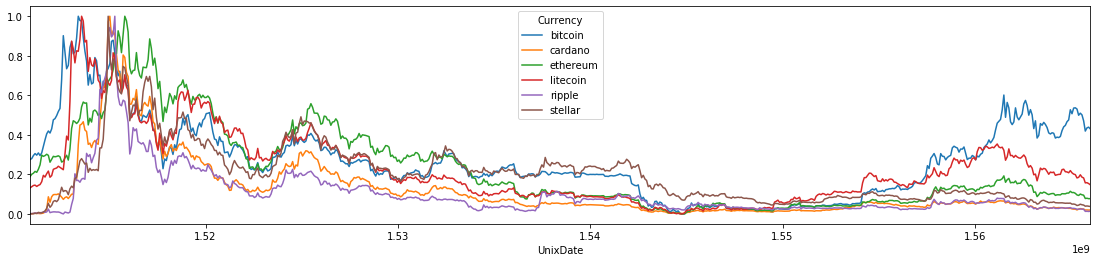

In [56]:
plt.figure()
df_norm.plot(figsize=(19,4))

<Figure size 432x288 with 0 Axes>

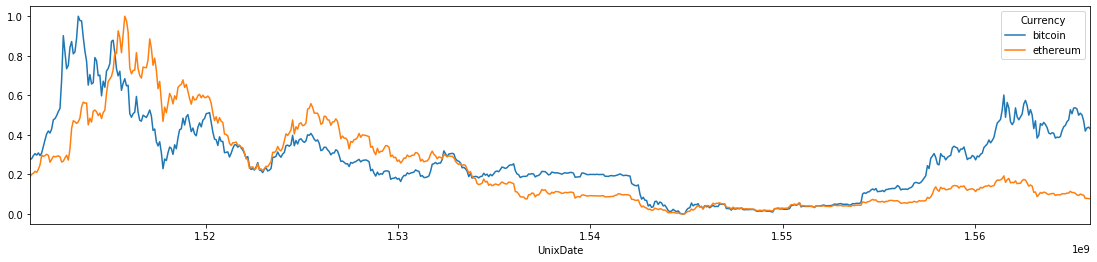

In [57]:
plt.figure()
df_norm[['bitcoin','ethereum']].plot(figsize=(19,4))

In [58]:
df_ml = pd.DataFrame(data={'bitcoin':df_norm['bitcoin'].values,'ethereum':df_norm['ethereum'].values,'litecoin':df_norm['litecoin'].values,'ripple':df_norm['ripple'].values},index=df_norm.index)

In [59]:
df_ml.head()

,bitcoin,ethereum,litecoin,ripple
UnixDate,,,,
1510876800,0.275034,0.189070,0.131719,0.001190
1510963200,0.280025,0.200669,0.137900,0.001838
1511049600,0.295175,0.205836,0.143723,0.002595
1511136000,0.305270,0.215241,0.145694,0.005048
1511222400,0.297313,0.210417,0.139065,0.003309


In [60]:
X = df_ml[['ripple','litecoin','ethereum']]
y = df_ml['bitcoin']

In [61]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

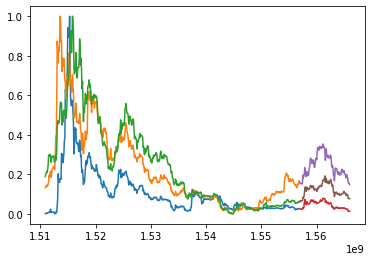

In [62]:
plt.plot(X_train)
plt.plot(X_test)
plt.show()

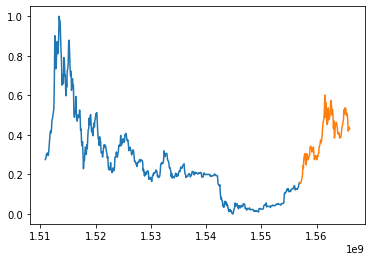

In [63]:
plt.plot(y_train)
plt.plot(y_test)
plt.show()

# LSTM

In [64]:
X_train = np.reshape(X_train.to_numpy(), (X_train.to_numpy().shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.to_numpy(), (X_test.to_numpy().shape[0], 1, X_test.shape[1]))

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.LSTM(20, input_shape=(1, 3), return_sequences=True))
model2.add(layers.LSTM(20))
model2.add(layers.Dense(1, activation='relu'))
model2.compile(optimizer="adam", loss="mean_squared_error")
model2.fit(X_train, y_train, epochs=75, verbose=0)

In [66]:
model2.evaluate(X_test, y_test)

106/106 [==============================] - 1s 11ms/sample - loss: 0.0357


0.0357467031703805

In [67]:
m2predictions = model2.predict(X_test)
zipped2 = list(zip(m2predictions,y_test))

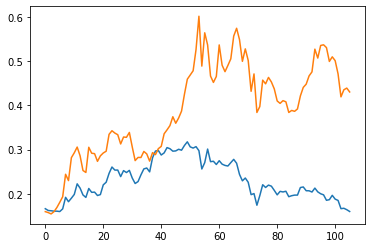

In [68]:
plt.plot(zipped2)

In [69]:
df_focus.loc[df_focus['Currency'] == 'bitcoin'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index().sort_index(ascending=True, axis=0).head(10)

,index,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,4747,bitcoin,08-08-2015,279.74,279.93,260.71,261.00,"58,533,000","3,778,049,024",1438992000
1,4746,bitcoin,08-09-2015,261.12,267.00,260.47,265.08,"23,789,600","3,838,130,130",1439078400
2,4745,bitcoin,08-10-2015,265.48,267.03,262.60,264.47,"20,979,400","3,830,352,069",1439164800
3,4744,bitcoin,08-11-2015,264.34,270.39,264.09,270.39,"25,433,900","3,917,142,819",1439251200
4,4743,bitcoin,08-12-2015,270.60,270.67,265.47,266.38,"26,815,400","3,859,888,131",1439337600
5,4742,bitcoin,08-13-2015,266.18,266.23,262.84,264.08,"27,685,500","3,827,588,724",1439424000
6,4741,bitcoin,08-14-2015,264.13,267.47,261.48,265.68,"27,091,200","3,851,715,726",1439510400
7,4740,bitcoin,08-15-2015,265.53,266.67,261.30,261.55,"19,321,100","3,792,757,590",1439596800
8,4739,bitcoin,08-16-2015,261.87,262.44,257.04,258.51,"29,717,000","3,749,501,856",1439683200
9,4738,bitcoin,08-17-2015,258.49,260.51,257.12,257.98,"21,617,900","3,742,748,055",1439769600


In [70]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
df = df_focus.loc[df_focus['Currency'] == 'bitcoin'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index()

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [71]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1247,:]
valid = dataset[1247:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

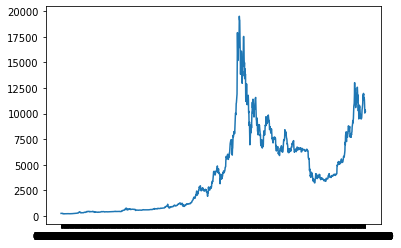

In [72]:
plt.plot(new_data)

In [73]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# create and fit the LSTM network
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model4.add(LSTM(units=50))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model4.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Train on 1217 samples
1217/1217 - 27s - loss: 0.0025


In [74]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

653.1888077742747

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


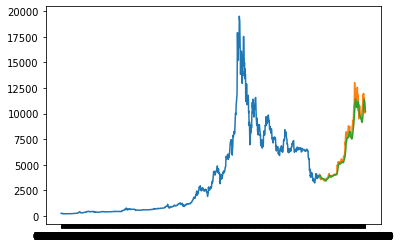

In [75]:
train = new_data[:1247]
valid = new_data[1247:]
valid['Predictions'] = closing_price

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

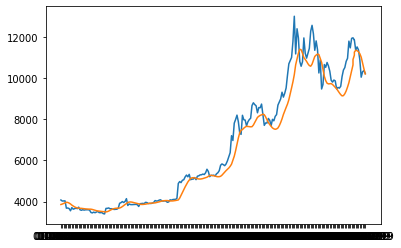

In [76]:
plt.plot(valid[['Close','Predictions']])

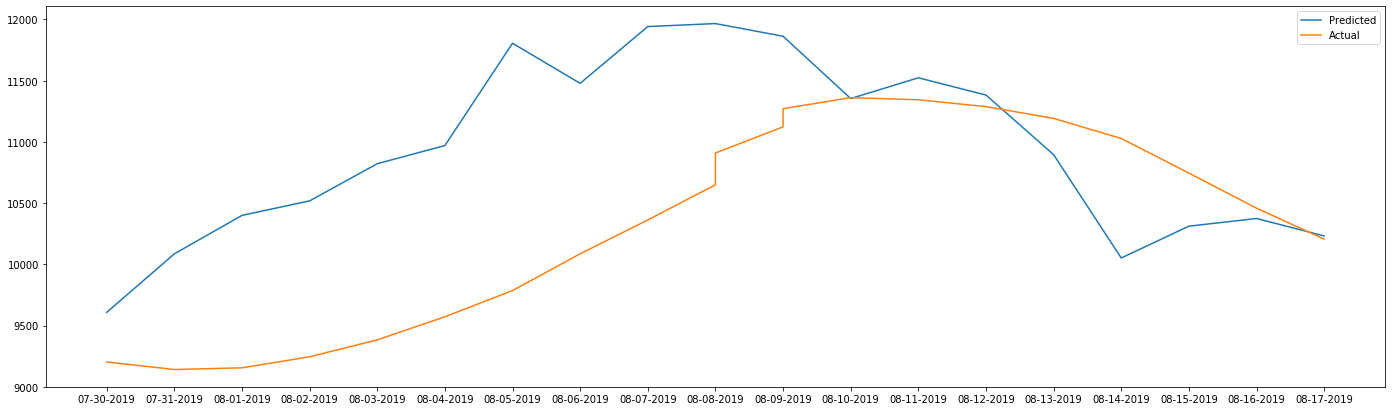

In [77]:
plt.figure(figsize=(24,7))
plt.plot(valid[['Close','Predictions']].tail(21))
plt.legend(['Predicted','Actual'])

In [78]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
df = df_focus.loc[df_focus['Currency'] == 'ethereum'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index()

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1247,:]
valid = dataset[1247:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model4.add(LSTM(units=50))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model4.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

Train on 1217 samples
1217/1217 - 28s - loss: 0.0025


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


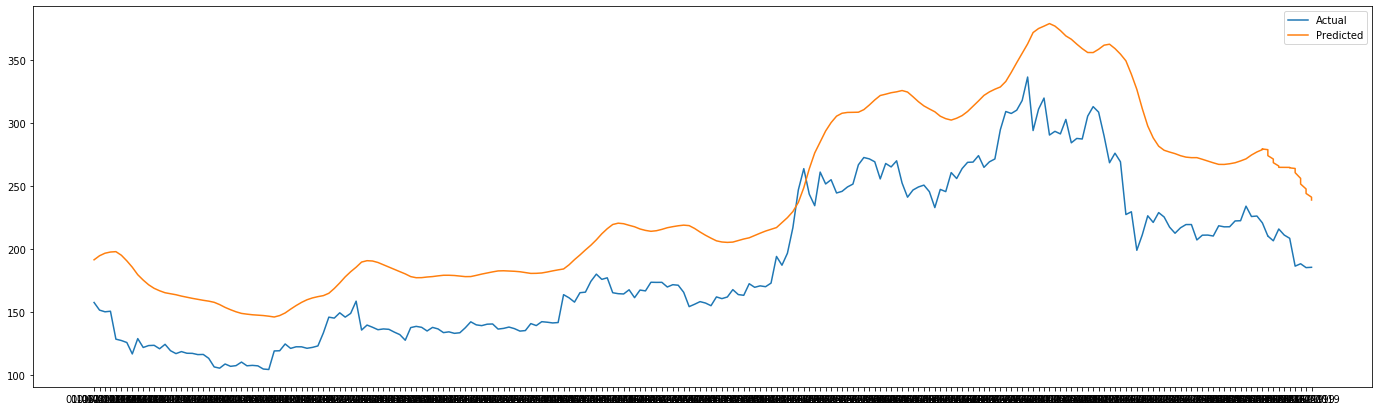

In [79]:
train = new_data[:1247]
valid = new_data[1247:]
valid['Predictions'] = closing_price

#plt.plot(train['Close'])
plt.figure(figsize=(24,7))
plt.plot(valid[['Close','Predictions']])
plt.legend(['Actual','Predicted'])

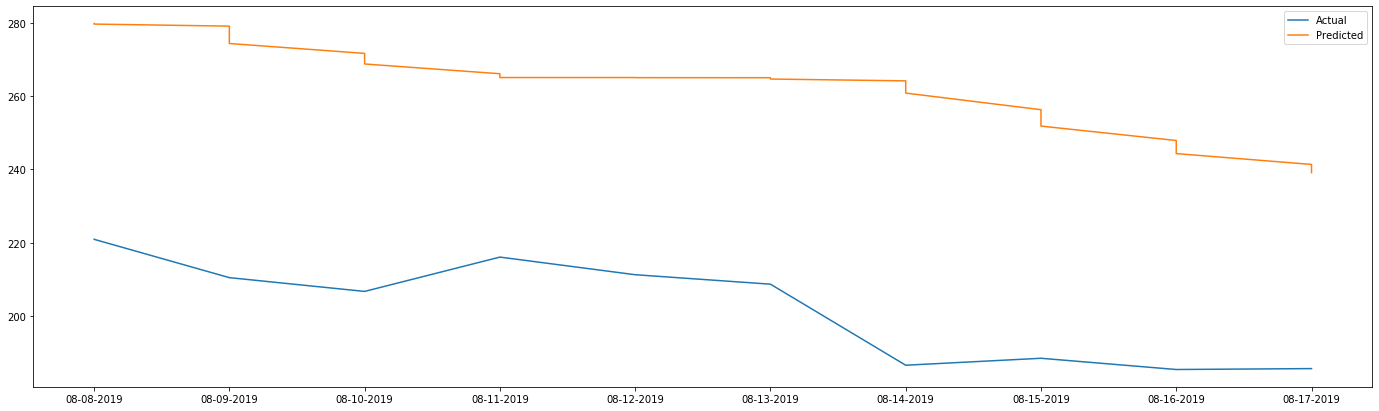

In [80]:
plt.figure(figsize=(24,7))
plt.plot(valid[['Close','Predictions']].tail(21))
plt.legend(['Actual','Predicted'])